Copyright (c) 2019 Computational-Medicine

# Brain connectivity - graphs, networks, and nilearn

**Adapted from http://nilearn.github.io/auto_examples/03_connectivity/plot_adhd_spheres.html**

### Introduction to graphs

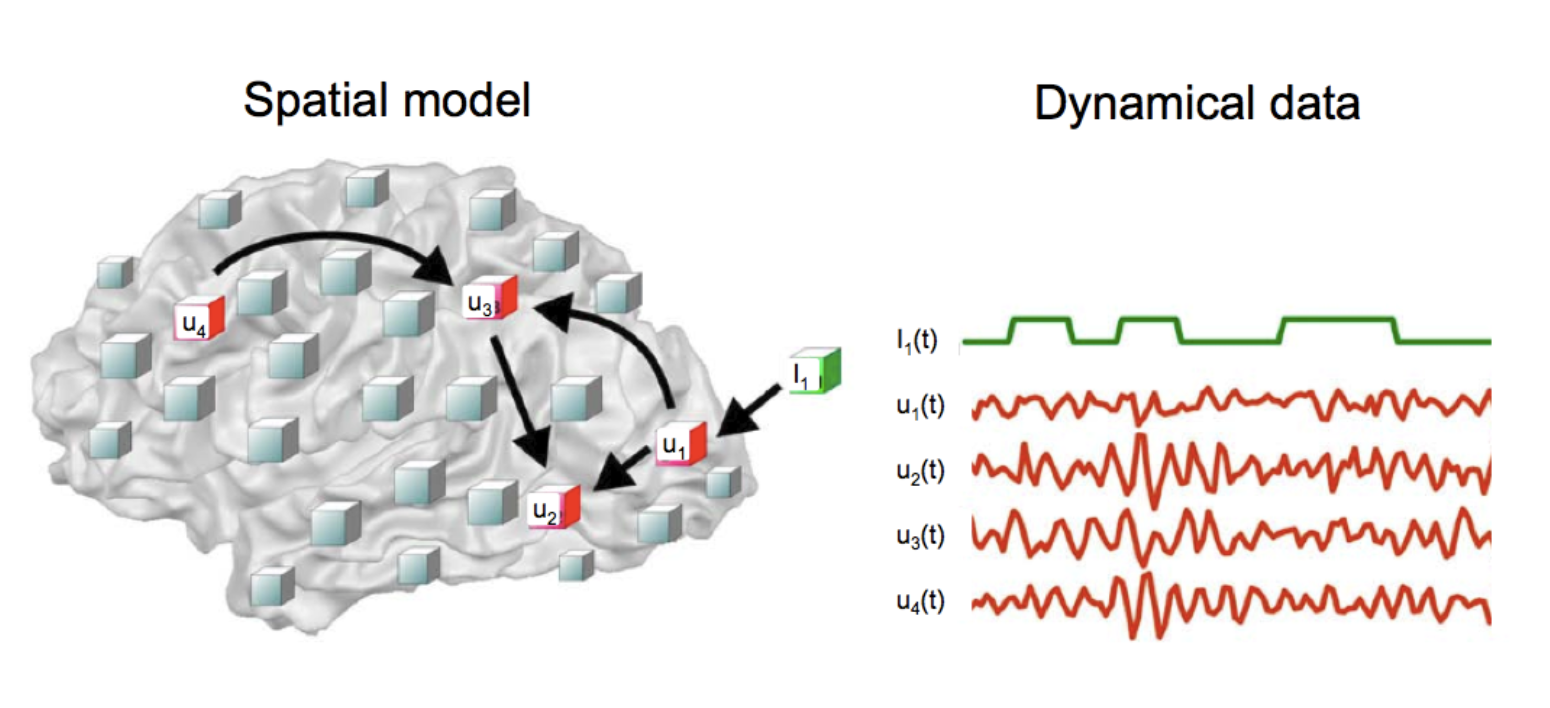

In [5]:
%matplotlib inline
from IPython.display import Image
Image(filename='./assets/network_brain_spatial_dynamic.png', width=600)

In [6]:
import numpy as np
import pandas as pd
import nibabel as nib

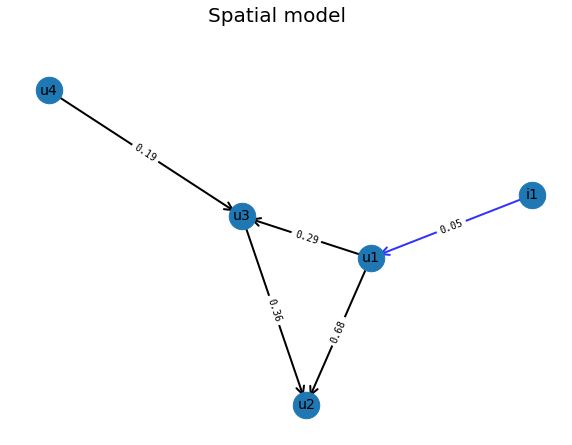

In [290]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_edge('u1', 'u2', weight=0.68)
G.add_edge('u1', 'u3', weight=0.29)
G.add_edge('u3', 'u2', weight=0.36)
G.add_edge('u4', 'u3', weight=0.19)
G.add_edge('i1', 'u1', weight=0.05)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.05]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.05]

# pos = nx.spring_layout(G)  # positions for all nodes

pos = {'u1': [0.8, 0.1], 
       'u2': [0.6, -0.6], 
       'u3': [0.4, 0.3], 
       'u4': [-0.2,  0.9], 
       'i1': [1.3 , 0.4]}

edge_labels = dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])

fig = plt.figure(figsize=(10, 7))
fig.suptitle('Spatial model', fontsize=20)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, arrowstyle='->', arrowsize=20, width=2)
nx.draw_networkx_edges(G, pos, edgelist=esmall, arrowstyle='->', arrowsize=20, width=2, 
                       alpha=0.8, edge_color='b', style='dotted')

# labels
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, font_size=10, font_family='monospace', edge_labels=edge_labels)

plt.axis('off')
plt.show()

In [291]:
print('G.number_of_nodes:', G.number_of_nodes())
print('G.number_of_edges:', G.number_of_edges())
print('G.adj[\'u1\']:', G.adj['u1'])
print('G.adj[\'u4\']:', G.adj['u4'])
print('G.degree[\'u1\']:', G.degree['u1'])
print('G.degree[\'u4\']:', G.degree['u4'])
print('G.degree[\'u3\']:', G.degree['u3'])
print('G.in_degree[\'u3\']:', G.in_degree['u3'])
print('G.out_degree[\'u3\']:', G.out_degree['u3'])
A = nx.to_numpy_matrix(G)
print('nx.to_numpy_matrix(G):\n', A)
nodenames = list(pos.keys())
df = pd.DataFrame(A, columns = nodenames)
print('\nAdjacency matrix:\n')
df

G.number_of_nodes: 5
G.number_of_edges: 5
G.adj['u1']: {'u2': {'weight': 0.68}, 'u3': {'weight': 0.29}}
G.adj['u4']: {'u3': {'weight': 0.19}}
G.degree['u1']: 3
G.degree['u4']: 1
G.degree['u3']: 3
G.in_degree['u3']: 2
G.out_degree['u3']: 1
nx.to_numpy_matrix(G):
 [[0.   0.68 0.29 0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.36 0.   0.   0.  ]
 [0.   0.   0.19 0.   0.  ]
 [0.05 0.   0.   0.   0.  ]]

Adjacency matrix:



u1    u2    u3   u4   i1
0  0.00  0.68  0.29  0.0  0.0
1  0.00  0.00  0.00  0.0  0.0
2  0.00  0.36  0.00  0.0  0.0
3  0.00  0.00  0.19  0.0  0.0
4  0.05  0.00  0.00  0.0  0.0

In [292]:
dfT = pd.read_csv('../data/mri/u1_u2_u3_u4_time_series.csv')
dfT.head()

u1(t)     u2(t)     u3(t)     u4(t)
0 -0.689055 -0.886572 -0.843912 -0.659629
1 -0.517032  0.080367 -1.007703  0.632246
2 -0.665603 -0.034317  0.397758  0.194771
3 -0.537988 -0.283169  1.653149 -1.080778
4  0.406382  0.572715  0.797361 -1.129852

In [296]:
dfT.tail()

u1(t)     u2(t)     u3(t)     u4(t)
171 -0.527714 -1.295423 -1.392300 -0.442154
172  0.112534 -0.107037  0.139086 -0.938219
173  1.171720  0.732386  1.056790 -1.029000
174  1.295892  0.595701  0.872633 -0.556812
175  0.279403  0.162900  0.020168  0.250217

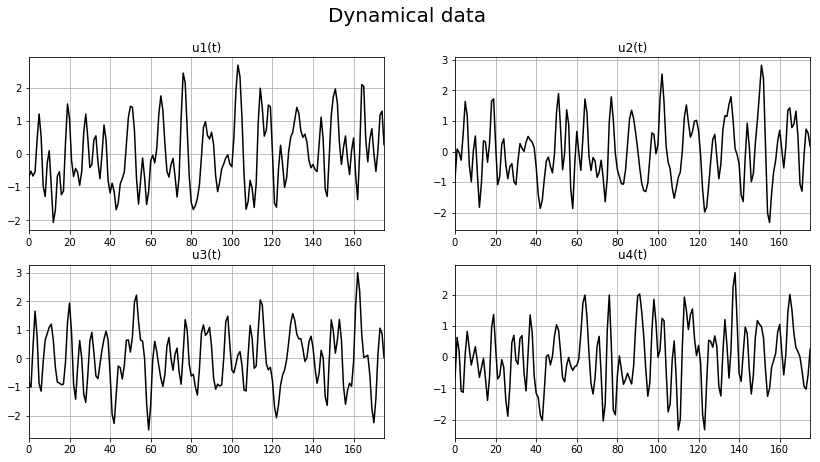

In [299]:
fig = plt.figure(figsize=(14, 7))

fig.suptitle('Dynamical data', fontsize=20)
i=0
for time_serie, label in zip(dfT.values.T, dfT.columns):
    ax = fig.add_subplot(2,2,i+1)
    dfT.plot(ax=ax, use_index = True, y=label, colormap = 'gray', title=label, legend=False, grid=True)
    i=i+1

#dfT.plot(use_index = True, y='u1(t)', colormap = 'gray')
#dfT.plot(use_index = True, colormap = 'gray')

In [300]:
print('Pearson correlation:\n')
dfT.corr(method='pearson').round(2)

Pearson correlation:



u1(t)  u2(t)  u3(t)  u4(t)
u1(t)   1.00   0.68   0.29   0.50
u2(t)   0.68   1.00   0.36   0.52
u3(t)   0.29   0.36   1.00   0.19
u4(t)   0.50   0.52   0.19   1.00

Data from ADHD
=============

http://fcon_1000.projects.nitrc.org/indi/adhd200/ <br>
https://www.nitrc.org/frs/?group_id=383



The ADHD-200 Sample is a grassroots initiative, dedicated to accelerating the scientific community's understanding of the neural basis of ADHD through the implementation of open data-sharing and discovery-based science. Towards this goal, we are pleased to announce the unrestricted public release of 776 resting-state fMRI and anatomical datasets aggregated across 8 independent imaging sites, 491 of which were obtained from typically developing individuals and 285 in children and adolescents with ADHD (ages: 7-21 years old). Accompanying phenotypic information includes: diagnostic status, dimensional ADHD symptom measures, age, sex, intelligence quotient (IQ) and lifetime medication status. Preliminary quality control assessments (usable vs. questionable) based upon visual timeseries inspection are included for all resting state fMRI scans.

In accordance with HIPAA guidelines and 1000 Functional Connectomes Project protocols, all datasets are anonymous, with no protected health information included.

Consistent with the policies of the 1000 Functional Connectome Project, data usage is unrestricted for non-commercial research purposes. We kindly request that the specific datasets included in analyses be specified appropriately, and that their funding sources be acknowledged. As per INDI protocol, we simply require that user register with the NITRC and 1000 Functional Connectomes Project to gain access.

**ADHD-200 Phenotypic Key**

_Site_
1 Peking University,
2 Bradley Hospital/Brown University,
3 Kennedy Krieger Institute,
4 NeuroIMAGE Sample,
5 New York University Child Study Center,
6 Oregon Health & Science University,
7 University of Pittsburgh,
8 Washington University in St. Louis

_Gender_:
0 Female,
1 Male

_Handedness_:
0 Left,
1 Right,
2 Ambidextrous

_Diagnosis_:
0 Typically Developing Children,
1 ADHD-Combined,
2 ADHD-Hyperactive/Impulsive,
3 ADHD-Inattentive,

_ADHD Measure_:
1 ADHD Rating Scale IV (ADHD-RS),
2 Conners’ Parent Rating Scale-Revised, Long version (CPRS-LV),
3 Connors’ Rating Scale-3rd Edition

_IQ Measure_:
1 Wechsler Intelligence Scale for Children, Fourth Edition (WISC-IV),
2 Wechsler Abbreviated Scale of Intelligence (WASI),
3 Wechsler Intelligence Scale for Chinese Children-Revised (WISCC-R),
4 Two subtest WASI,
5 Two subtest WISC or WAIS – Block Design and Vocabulary

_Medication Status_:
1 Medication Naïve,
2 Not Medication Naïve

_Quality Control_:
0 Questionable,
1 Pass

To inspect these data:
```python
fpath = '../data/phenotypics/adhd200_preprocessed_phenotypics.tsv'
dfP = pd.read_csv(fpath, sep='\t') 
# Site 5 only:
NYU = dfP.loc[dfP['Site']==5]
```

Preprocessing  
-------------

(Already performed and accessed by NILEARN)

**Bash scripts** that implement the Athena pipeline are available [here](https://github.com/preprocessed-connectomes-project/adhd200_athena_scripts) 

These are old scripts that have been replaced by the Configurable Pipeline for the Analysis of Connectoms ([C-PAC](http://fcp-indi.github.io)). The C-PAC GitHub repository is [here](https://github.com/FCP-INDI/C-PAC).

_A configurable, open-source, Nipype-based, automated processing pipeline for resting state fMRI data. Designed for use by both novice users and experts, C-PAC brings the power, flexibility and elegance of Nipype to users in a plug-and-play fashion; no programming required._

See also http://fcp-indi.github.io/docs/user/quick.html


Extracting brain signal from spheres
====================================

This example extract brain signals from spheres described by the coordinates
of their center in MNI space and a given radius in millimeters. In particular,
this example extracts signals from Default Mode Network regions and compute a
connectome from them.




Retrieve the dataset
---------------------



```python
from nilearn import datasets
adhd_dataset = datasets.fetch_adhd(n_subjects=4)

# print basic information on the dataset
print('First subject functional nifti image (4D) is at:\n ~%s' %
      adhd_dataset.func[0][14:])  # 4D data

print('Second subject functional nifti image (4D) is at:\n ~%s' %
      adhd_dataset.func[1][14:])  # 4D data

print('Third subject functional nifti image (4D) is at:\n ~%s' %
      adhd_dataset.func[2][14:])  # 4D data

print('Fourth subject functional nifti image (4D) is at:\n ~%s' %
      adhd_dataset.func[3][14:])  # 4D data

First subject functional nifti image (4D) is at:
 ~/nilearn_data\adhd\data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz
Second subject functional nifti image (4D) is at:
 ~/nilearn_data\adhd\data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz
Third subject functional nifti image (4D) is at:
 ~/nilearn_data\adhd\data/0010128/0010128_rest_tshift_RPI_voreg_mni.nii.gz
Fourth subject functional nifti image (4D) is at:
 ~/nilearn_data\adhd\data/0021019/0021019_rest_tshift_RPI_voreg_mni.nii.gz
```

**Metadata**

In [7]:
fpath = '../data/phenotypics/adhd200_preprocessed_phenotypics.tsv'
dfP = pd.read_csv(fpath, sep='\t')

df1 = dfP.loc[dfP['ScanDir ID']==10042]
df2 = dfP.loc[dfP['ScanDir ID']==10064]
df3 = dfP.loc[dfP['ScanDir ID']==10128]
df4 = dfP.loc[dfP['ScanDir ID']==21019]
frames = [df1, df2, df3, df4]
dfADHD = pd.concat(frames, ignore_index=True)
dfADHD

ScanDir ID  Site  Gender    Age Handedness DX  \
0       10042     5     1.0  10.65       0.91  1   
1       10064     5     1.0  15.90       0.76  1   
2       10128     5     1.0   9.53       0.82  0   
3       21019     5     1.0  15.53       0.73  0   

                               Secondary Dx ADHD Measure ADHD Index  \
0                                       NaN            2         65   
1  social anxiety disorder; specific phobia            2         81   
2                                       NaN            2         56   
3                                       NaN          NaN         40   

  Inattentive Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  \
0          59              56         2.0      100.0           115.0   
1          81              90         2.0       95.0           107.0   
2          58              60         2.0      112.0           136.0   
3          45              43         2.0      112.0            99.0   

   Full2 IQ  Full4 IQ Med Status  QC_Athena  QC_NIAK  
0       NaN     108.0       -999        1.0      1.0  
1       NaN     101.0          2        1.0      1.0  
2       NaN     127.0          1        1.0      1.0  
3       NaN     107.0        NaN        0.0      1.0

**Image data**  (first subject)

In [8]:
mydata = '../data/mri'
rest_name = 'adhd200_10042_rest_tshift_RPI_voreg_mni'
confound_name = 'adhd200_10042_regressors'
anat_name = 'adhd200_10042_anat'

rest_fn = '%s/%s.nii.gz' % (mydata, rest_name)
confound_fn = '%s/%s.csv' % (mydata, confound_name)
anat_fn = '%s/%s.nii.gz' % (mydata, anat_name)

img = nib.load(rest_fn)
simg = nib.load(anat_fn)

In [9]:
print('file name', img.get_filename())
print('shape of image = ', img.header.get_data_shape())
print('units = ', img.header.get_xyzt_units())
print('voxel size = ', img.header.get_zooms())
print('dtype = %s' % img.header.get_data_dtype())
data = img.get_data()
print('data shape', data.shape)
print('min = %d' % data.min())
print('max = %d' % data.max())
print('number of timepoints =', img.shape[-1])
#print(img.header)

file name ../data/mri/adhd200_10042_rest_tshift_RPI_voreg_mni.nii.gz
shape of image =  (61, 73, 61, 176)
units =  ('mm', 'sec')
voxel size =  (3.0, 3.0, 3.0, 2.0)
dtype = float32
data shape (61, 73, 61, 176)
min = 0
max = 24359
number of timepoints = 176


In [10]:
print('structural file name', simg.get_filename())
print('shape of image = ', simg.header.get_data_shape())
print('units = ', simg.header.get_xyzt_units())
print('voxel size = ', simg.header.get_zooms())
print('dtype = %s' % simg.header.get_data_dtype())
sdata = simg.get_data()
print('data shape', sdata.shape)
print('min = %d' % sdata.min())
print('max = %d' % sdata.max())
#print(simg.header)

structural file name ../data/mri/adhd200_10042_anat.nii.gz
shape of image =  (128, 256, 256)
units =  ('mm', 'unknown')
voxel size =  (1.3300018, 1.0, 1.0)
dtype = int16
data shape (128, 256, 256)
min = 0
max = 751


In [11]:
confound = pd.read_csv(confound_fn, sep='\t')
confound.head(5).T

0             1             2             3  \
csf           12140.708282  12123.146913  12085.963127  12109.299348   
constant          1.000000      1.000000      1.000000      1.000000   
linearTrend       0.000000      1.000000      2.000000      3.000000   
wm             9322.722489   9314.257684   9319.610045   9299.841075   
global         9955.469315   9947.987176   9945.132852   9943.648622   
motion-pitch     -0.063700     -0.070800     -0.079500     -0.060700   
motion-roll       0.103200      0.095300      0.097100      0.091800   
motion-yaw       -0.151600     -0.156200     -0.145300     -0.160100   
motion-x         -0.037600     -0.019800     -0.043900     -0.041800   
motion-y         -0.011200      0.002100     -0.024100     -0.013300   
motion-z          0.084000      0.072200      0.097200      0.087700   
gm            10617.938409  10611.036827  10591.877177  10592.008336   
compcor1         -0.035058     -0.026949      0.002552      0.079391   
compcor2         -0.006713     -0.091152      0.069165      0.029959   
compcor3         -0.071532     -0.030126      0.090166     -0.098036   
compcor4          0.009847      0.020055     -0.016608      0.062493   
compcor5         -0.027601     -0.099798     -0.071980      0.024105   

                         4  
csf           12072.330305  
constant          1.000000  
linearTrend       4.000000  
wm             9297.870869  
global         9925.640852  
motion-pitch     -0.070600  
motion-roll       0.087300  
motion-yaw       -0.148200  
motion-x         -0.031300  
motion-y         -0.011800  
motion-z          0.071200  
gm            10570.445905  
compcor1          0.075471  
compcor2         -0.030123  
compcor3          0.084739  
compcor4          0.088217  
compcor5          0.012996

In [12]:
from nilearn.image import resample_to_img
from nilearn.image.image import mean_img

mean_rimg = mean_img(img)

resampled_simg = resample_to_img(simg, mean_rimg)

print('resampled_simg.shape\n', resampled_simg.shape)
print('img.shape\n', img.shape)
print('resampled_simg.affine\n', resampled_simg.affine)
print('img.affine\n', img.affine)

C:\Users\arvid\Anaconda3\envs\bmed360\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


resampled_simg.shape
 (61, 73, 61)
img.shape
 (61, 73, 61, 176)
resampled_simg.affine
 [[  -3.   -0.   -0.   90.]
 [  -0.    3.   -0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
img.affine
 [[  -3.   -0.   -0.   90.]
 [  -0.    3.   -0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]


Coordinates of Default Mode   (MNI152 space)
------------------------------------



In [13]:
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
labels = [
          'Posterior Cingulate Cortex',
          'Left Temporoparietal junction',
          'Right Temporoparietal junction',
          'Medial prefrontal cortex',
         ]
dmn_node_cols = ['r', 'g', 'b', 'k']

mean_rimg:


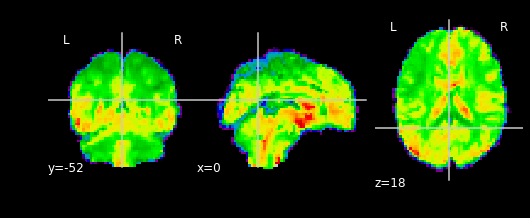

In [39]:
from nilearn import plotting
from nilearn.plotting import plot_epi, plot_anat, show

print('mean_rimg:')
plot_epi(mean_rimg, cut_coords=dmn_coords[0])
plotting.show()

resampled_simg:


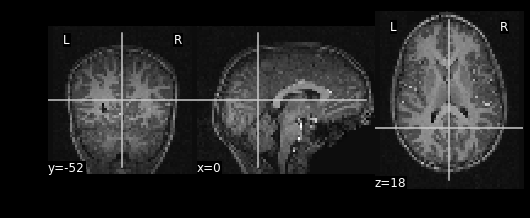

In [41]:
print('resampled_simg:')
plot_epi(resampled_simg, cmap = 'gray', cut_coords=dmn_coords[0])
plotting.show()

In [18]:
print('structural file name', simg.get_filename())
print('shape of image = ', resampled_simg.header.get_data_shape())
print('units = ', resampled_simg.header.get_xyzt_units())
print('voxel size = ', resampled_simg.header.get_zooms())
print('dtype = %s' % resampled_simg.header.get_data_dtype())
resampled_sdata = resampled_simg.get_data()
print('data shape', resampled_sdata.shape)
print('min = %d' % resampled_sdata.min())
print('max = %d' % resampled_sdata.max())
#print(simg.header)

structural file name ../data/mri/adhd200_10042_anat.nii.gz
shape of image =  (61, 73, 61)
units =  ('unknown', 'unknown')
voxel size =  (3.0, 3.0, 3.0)
dtype = float32
data shape (61, 73, 61)
min = -36
max = 699


Extracts signal from sphere around DMN seeds
---------------------------------------------

Extracting the mean time series within the seed region while regressing out the confounds that can be found in the dataset’s csv file


In [19]:
from nilearn import input_data

masker = input_data.NiftiSpheresMasker(
    dmn_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.5,
    memory='nilearn_cache', memory_level=1, verbose=0)

func_filename = rest_fn         # adhd_dataset.func[0]
confound_filename = confound_fn # adhd_dataset.confounds[0]

time_series = masker.fit_transform(func_filename, confounds=[confound_filename])
time_series.shape

(176, 4)

Next, we can proceed similarly for the **brain-wide voxel-wise time series**, using nilearn.input_data.NiftiMasker with the same input arguments as in the seed_masker in addition to smoothing with a 6 mm kernel

In [20]:
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.5,
    memory='nilearn_cache', memory_level=1, verbose=0)

Then we extract the brain-wide voxel-wise time series while regressing out the confounds as before

In [21]:
brain_time_series = brain_masker.fit_transform(rest_fn, confounds=[confound_fn])
brain_time_series.shape

(176, 69681)

Now that we have two arrays (**sphere signal**: (n_volumes, 1), **brain-wide voxel-wise signal** (n_volumes, n_voxels)), we can correlate the seed signal with the signal of each voxel. The dot product of the two arrays will give us this correlation. Note that the signals have been variance-standardized during extraction. To have them standardized to norm unit, we further have to divide the result by the length of the time series.

In [22]:
seed_time_series = time_series[:,0]  # Using only the first seed in the DMN network

seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

The resulting array will contain a value representing the correlation values between the signal in the **seed region of interest** and **each voxel’s signal**, and will be of shape (n_voxels, 1). The correlation values can potentially range between -1 and 1.

In [23]:
print("Seed time series shape: (%s)" % seed_time_series.shape)
print("Brain time series shape: (%s, %s)" % brain_time_series.shape)

Seed time series shape: (176)
Brain time series shape: (176, 69681)


In [24]:
print("Seed-to-voxel correlation shape: (%s)" %
      seed_to_voxel_correlations.shape)
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations.min(), seed_to_voxel_correlations.max()))

Seed-to-voxel correlation shape: (69681)
Seed-to-voxel correlation: min = -0.660; max = 0.959


Plotting the seed-to-voxel correlation map
----------------------------------------------------------

We can now plot the seed-to-voxel correlation map and perform thresholding to only show values more extreme than +/- 0.5. Before displaying, we need to create an in memory Nifti image object. Furthermore, we can display the location of the seed with a sphere and set the cross to the center of the seed region of interest.

In [25]:
seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
seed_to_voxel_correlations_img.shape

(61, 73, 61)

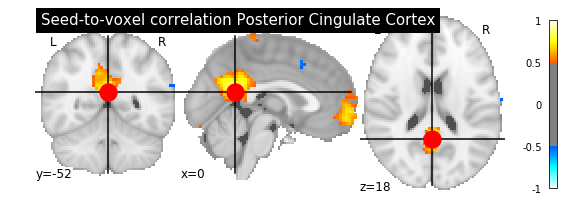

In [60]:
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=dmn_coords[0],
                                 title= 'Seed-to-voxel correlation %s' % labels[0]
                                 )

display.add_markers(marker_coords=[dmn_coords[0]], marker_color=dmn_node_cols[0],marker_size=300)

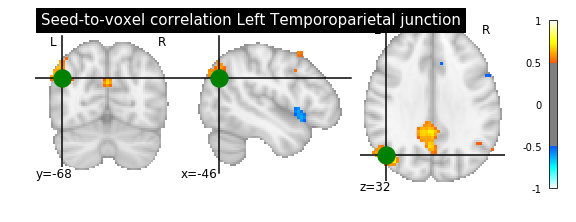

In [59]:
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=dmn_coords[1],
                                 title= 'Seed-to-voxel correlation %s' % labels[1]
                                 )

display.add_markers(marker_coords=[dmn_coords[1]], marker_color=dmn_node_cols[1],marker_size=300)

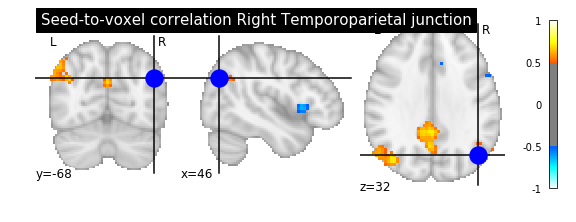

In [58]:
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=dmn_coords[2],
                                 title= 'Seed-to-voxel correlation %s' % labels[2]
                                 )

display.add_markers(marker_coords=[dmn_coords[2]], marker_color=dmn_node_cols[2],marker_size=300)

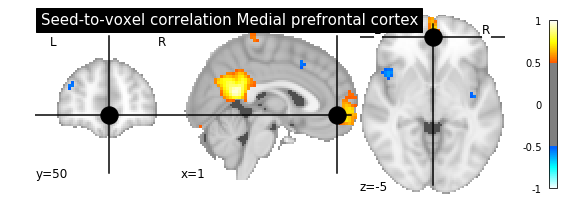

In [57]:
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=dmn_coords[3],
                                 title= 'Seed-to-voxel correlation %s' % labels[3]
                                 )

display.add_markers(marker_coords=[dmn_coords[3]], marker_color=dmn_node_cols[3],marker_size=300)

Not properly registered:


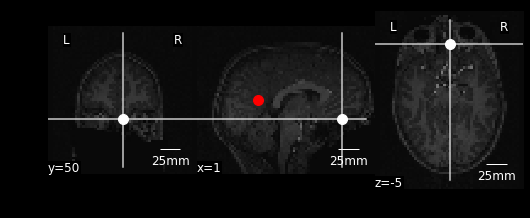

In [78]:
print('Not properly registered:')
display = plotting.plot_anat(resampled_simg, title='', cut_coords=dmn_coords[3])
display.add_markers(marker_coords=[dmn_coords[0]], marker_color='r',marker_size=100)
display.add_markers(marker_coords=[dmn_coords[1]], marker_color='g',marker_size=100)
display.add_markers(marker_coords=[dmn_coords[2]], marker_color='b',marker_size=100)
display.add_markers(marker_coords=[dmn_coords[3]], marker_color='w',marker_size=100)
display.annotate(scalebar=True, scale_size=25, scale_units='mm')

**Fisher-z transformation and save nifti**

Finally, we can Fisher-z transform the data to achieve a normal distribution. The transformed array can now have values more extreme than +/- 1.

In [38]:
seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
print("Seed-to-voxel correlation Fisher-z transformed: min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z.min(),
         seed_to_voxel_correlations_fisher_z.max()
         )
      )

# Finally, we can tranform the correlation array back to a Nifti image
# object, that we can save.
seed_to_voxel_correlations_fisher_z_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations_fisher_z.T)
seed_to_voxel_correlations_fisher_z_img.to_filename('../data/mri/adhd200_10042_dmn1_seed_correlation_z.nii.gz')

Seed-to-voxel correlation Fisher-z transformed: min = -0.793; max = 1.938


In [29]:
ts4 = time_series[:].T[:]
ts4.shape

(4, 176)

Display time series in the 4-node DMN network
--------------------



(4, 176)


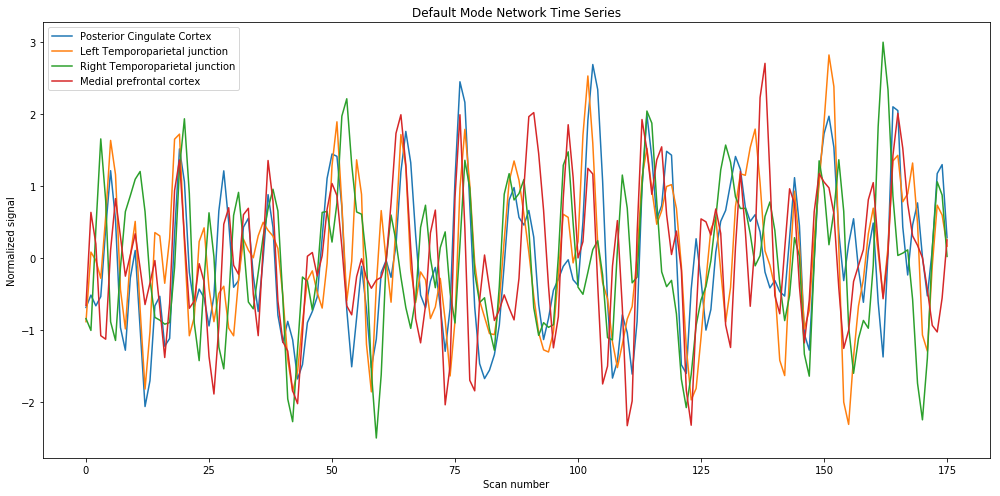

In [30]:
import matplotlib.pyplot as plt

ts4 = time_series[:].T[:]
print(ts4.shape)

plt.figure(figsize=(14, 7))

for time_serie, label in zip(ts4, labels):
    plt.plot(time_serie, label=label)

plt.title('Default Mode Network Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()

Compute partial correlation matrix
-----------------------------------
Using object :class:`nilearn.connectome.ConnectivityMeasure`: Its
default covariance estimator is Ledoit-Wolf, allowing to obtain accurate
partial correlations.



In [31]:
from nilearn.connectome import ConnectivityMeasure
connectivity_measure = ConnectivityMeasure(kind='partial correlation')
partial_correlation_matrix = connectivity_measure.fit_transform(
    [time_series])[0]

print(connectivity_measure)
pd.DataFrame(partial_correlation_matrix)

ConnectivityMeasure(cov_estimator=LedoitWolf(assume_centered=False, block_size=1000, store_precision=False),
          discard_diagonal=False, kind='partial correlation',
          vectorize=False)


0         1         2         3
0  1.000000  0.513866  0.079950  0.238494
1  0.513866  1.000000  0.211305  0.271284
2  0.079950  0.211305  1.000000 -0.006266
3  0.238494  0.271284 -0.006266  1.000000

Display connectome
-------------------

Using [nilearn.plotting.plot_connectome](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_connectome.html)
(the plotted image should be in MNI space for this function to work properly)

Display connectome with hemispheric projections.
Notice (0, -52, 18) is included in both hemispheres since x == 0.



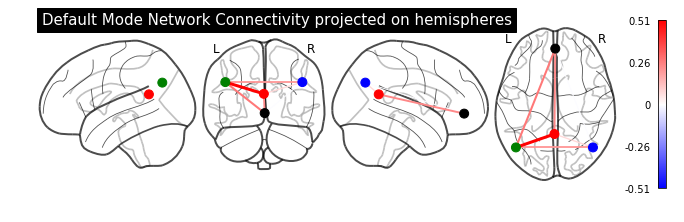

In [32]:
from nilearn import plotting
plotting.plot_connectome(partial_correlation_matrix, dmn_coords,
                         title="Default Mode Network Connectivity projected on hemispheres", colorbar=True,
                         node_size=80,
                         annotate=True,
                         node_color= dmn_node_cols, #'auto',
                         display_mode='lyrz')

plotting.show()

In [33]:
s = pd.Series(list(time_series.T),index=labels)
df = pd.DataFrame(s.values.tolist(), index=s.index)
df

0         1         2         3    \
Posterior Cingulate Cortex     -0.689055 -0.517032 -0.665603 -0.537988   
Left Temporoparietal junction  -0.886572  0.080367 -0.034317 -0.283169   
Right Temporoparietal junction -0.843912 -1.007703  0.397758  1.653149   
Medial prefrontal cortex       -0.659630  0.632246  0.194771 -1.080778   

                                     4         5         6         7    \
Posterior Cingulate Cortex      0.406382  1.211478  0.528542 -0.966708   
Left Temporoparietal junction   0.572715  1.631950  1.156941 -0.439048   
Right Temporoparietal junction  0.797361 -0.888124 -1.147237 -0.133526   
Medial prefrontal cortex       -1.129853  0.108070  0.823279  0.295395   

                                     8         9    ...       166       167  \
Posterior Cingulate Cortex     -1.282957 -0.280313  ...  0.430215 -0.237446   
Left Temporoparietal junction  -0.986715  0.017119  ...  0.779184  0.890794   
Right Temporoparietal junction  0.642853  0.862734  ...  0.066058  0.111633   
Medial prefrontal cortex       -0.253903  0.034550  ...  1.524183  0.752036   

                                     168       169       170       171  \
Posterior Cingulate Cortex      0.456770  0.764252  0.012565 -0.527714   
Left Temporoparietal junction   1.318172  0.482707 -1.071697 -1.295423   
Right Temporoparietal junction -0.576620 -1.742407 -2.250068 -1.392300   
Medial prefrontal cortex        0.305676  0.174074  0.002367 -0.442154   

                                     172       173       174       175  
Posterior Cingulate Cortex      0.112534  1.171720  1.295892  0.279403  
Left Temporoparietal junction  -0.107037  0.732387  0.595701  0.162900  
Right Temporoparietal junction  0.139086  1.056790  0.872633  0.020168  
Medial prefrontal cortex       -0.938219 -1.029000 -0.556812  0.250217  

[4 rows x 176 columns]

In [34]:
dmn_coords[0]

(0, -52, 18)

0 Posterior Cingulate Cortex
1 Left Temporoparietal junction
2 Right Temporoparietal junction
3 Medial prefrontal cortex


u1(t)     u2(t)     u3(t)     u4(t)
0 -0.689055 -0.886572 -0.843912 -0.659630
1 -0.517032  0.080367 -1.007703  0.632246
2 -0.665603 -0.034317  0.397758  0.194771
3 -0.537988 -0.283169  1.653149 -1.080778
4  0.406382  0.572715  0.797361 -1.129853

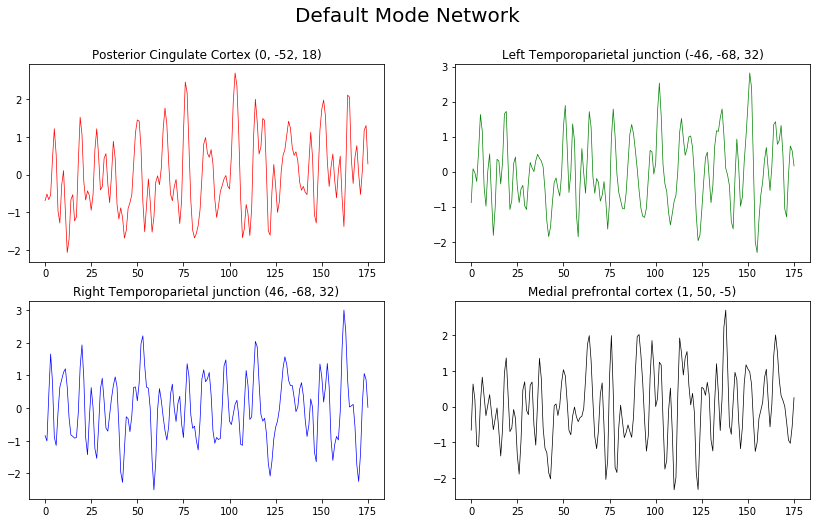

In [266]:
fig = plt.figure(figsize = (14,8))

fig.suptitle('Default Mode Network', fontsize=20)

for i, (time_serie, label) in enumerate(zip(ts4, labels)):
    print(i, label)
    ax = fig.add_subplot(2,2,i+1)
    ax.set_title('%s %s' % (label, dmn_coords[i]) )
    ax.plot(time_serie, '-', color = dmn_node_cols[i],  linewidth=0.7)

nodename_t = []
for i in range(4):
    nodename_t.append('%s(t)' % (nodenames[i]))  
dfT = pd.DataFrame(ts4.T, columns = list(nodename_t))
#dfT.to_csv('../data/mri/u1_u2_u3_u4_time_series.csv', index=False)
dfT.head()

3D visualization in a web browser
---------------------------------
An alternative to :func:`nilearn.plotting.plot_connectome` is to use
:func:`nilearn.plotting.view_connectome` that gives more interactive
visualizations in a web browser. See `interactive-connectome-plotting`
for more details.



In [36]:
view = plotting.view_connectome(partial_correlation_matrix, 
                                dmn_coords,
                               node_size = 10,
                               linewidth = 10)

# uncomment this to open the plot in a web browser:
#view.open_in_browser()

In a Jupyter notebook, if ``view`` is the output of a cell, it will
be displayed below the cell



In [37]:
view